In [340]:
# Import Chess Libraries
import chess
import chess.pgn

# Import General Libraries
import pandas as pd
import re

# Visualizations Library
import matplotlib.pyplot as plt

# Calculate time for execution
from time import time

In [318]:
board = chess.Board()

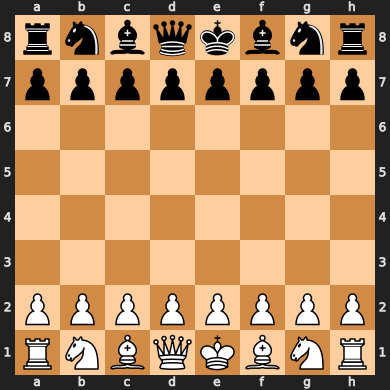

In [319]:
board

In [344]:
game_dict = {}
header_list = ['Event', 'White', 'Black', 'Result', 
               'UTCDate', 'UTCTime', 'WhiteElo', 'BlackElo', 
               'WhiteRatingDiff', 'BlackRatingDiff', 'ECO', 
               'Opening', 'TimeControl', 'Termination',
               'MoveDetail','MoveCount']

# No of records to process
record_list = [100, 1000, 10000, 50000, 150000]

# Open PGN File
with open("Chess_Data.pgn") as pgn:

    for current_records in record_list:

        start_time = time()

        #Dictionary Index
        n=0

        # Loop over all games
        while True:

            game_list = []
            flag = 0
            if n == current_records:
                break
            else:
                n = n+1

            # Read current game
            try:
                current_game = chess.pgn.read_game(pgn)
            except UnicodeDecodeError:
                print('Cannot Decode This Game!')
                continue

            # If current game is empty, break the loop
            if current_game is None:
                break

            for header in header_list:
                if header == 'MoveDetail' or header == 'MoveCount':
                    continue
                if not header in current_game.headers:
                    flag = 1

            # Insert data if all header exist
            if flag == 0:

                MoveCount = 1
                MovesAdded = 0
                MoveDetail = ""
                # Store moves in dataframe
                moves = str(current_game.mainline_moves()).split()
                for move in moves:
                    move = move.replace('.',"")
                    try:
                        MoveCount = int(move)
                    except:
                        if MoveDetail == "":
                            MoveDetail = str(move)
                            MovesAdded = MovesAdded + 1
                        elif MovesAdded != 2:
                            MoveDetail = str(MoveDetail) + " " + str(move)
                            MovesAdded = MovesAdded + 1
                        else:
                            MoveDetail = str(MoveDetail) + "\n" + str(move)
                            MovesAdded = 1

                # Add 1 game data into list
                game_list.append(current_game.headers["Event"])
                game_list.append(current_game.headers["White"])
                game_list.append(current_game.headers["Black"])
                game_list.append(current_game.headers["Result"])
                game_list.append(current_game.headers["UTCDate"])
                game_list.append(current_game.headers["UTCTime"])
                game_list.append(current_game.headers["WhiteElo"])
                game_list.append(current_game.headers["BlackElo"])
                game_list.append(current_game.headers["WhiteRatingDiff"])
                game_list.append(current_game.headers["BlackRatingDiff"])
                game_list.append(current_game.headers["ECO"])
                game_list.append(current_game.headers["Opening"])
                game_list.append(current_game.headers["TimeControl"])
                game_list.append(current_game.headers["Termination"])
                game_list.append(MoveDetail)
                game_list.append(MoveCount)


            # Add each game data into dictionary
            game_dict[n] = game_list
        
        # End Time
        end_time = time()

        # Total Time to transform chess data to dictionary
        print("Total Time to parse", n, "chess data into dictionary:",end_time - start_time, "seconds")
        
        df = pd.DataFrame.from_dict(game_dict,
                            orient='index',
                            columns=header_list)
        
        df.dropna(axis = 0, how='any',inplace=True)
        
        df.loc[df['Result'] == '1-0', 'Result'] = 'White'
        df.loc[df['Result'] == '0-1', 'Result'] = 'Black'
        df.loc[df['Result'] == '1/2-1/2', 'Result'] = 'Draw'
        
        # Renaming the Column Name
        df.rename(columns={'WhiteElo':'WhiteOldRank'}, inplace=True)
        df.rename(columns={'BlackElo':'BlackOldRank'}, inplace=True)
        df.rename(columns={'WhiteRatingDiff':'WhiteNewRank'}, inplace=True)
        df.rename(columns={'BlackRatingDiff':'BlackNewRank'}, inplace=True)

        # Update NewRank of the player
        for index, row in df.iterrows():
            row['WhiteNewRank'] = int(row['WhiteOldRank']) - int(re.sub('[^a-zA-Z0-9 \n\.]', '', str(row['WhiteNewRank'])))
            row['BlackNewRank'] = int(row['BlackOldRank']) - int(re.sub('[^a-zA-Z0-9 \n\.]', '', str(row['BlackNewRank'])))
            df.loc[index, 'WhiteNewRank'] = row['WhiteNewRank']
            df.loc[index, 'BlackNewRank'] = row['BlackNewRank']
        
        # Saved Parsed File
        filename = "Parsed_Chess_Data_" + str(current_records) + ".csv"
        df.to_csv(filename)

Total Time to parse 100 chess data into dictionary: 0.9431989192962646 seconds
Total Time to parse 1000 chess data into dictionary: 10.738052129745483 seconds
Total Time to parse 10000 chess data into dictionary: 96.26123237609863 seconds
Total Time to parse 50000 chess data into dictionary: 532.3146078586578 seconds
Total Time to parse 60233 chess data into dictionary: 672.2069427967072 seconds


In [321]:
df = pd.DataFrame.from_dict(game_dict,
                            orient='index',
                            columns=header_list)
df.head(5)

Event             White              Black Result  \
1  Rated Classical game             BFG9k            mamalak    1-0   
2  Rated Classical game    Desmond_Wilson          savinka59    1-0   
3  Rated Classical game     Kozakmamay007  VanillaShamanilla    1-0   
4     Rated Bullet game  Naitero_Nagasaki                800    0-1   
5     Rated Bullet game      nichiren1967   Naitero_Nagasaki    0-1   

      UTCDate   UTCTime WhiteElo BlackElo WhiteRatingDiff BlackRatingDiff  \
1  2012.12.31  23:01:03     1639     1403              +5              -8   
2  2012.12.31  23:04:12     1654     1919             +19             -22   
3  2012.12.31  23:03:15     1643     1747             +13             -94   
4  2012.12.31  23:04:57     1824     1973              -6              +8   
5  2012.12.31  23:02:37     1765     1815              -9              +9   

   ECO                                      Opening TimeControl Termination  \
1  C00             French Defense: Normal Variation       600+8      Normal   
2  D04  Queen's Pawn Game: Colle System, Anti-Colle       480+2      Normal   
3  C50         Four Knights Game: Italian Variation      420+17      Normal   
4  B12         Caro-Kann Defense: Goldman Variation        60+1      Normal   
5  C00     French Defense: La Bourdonnais Variation        60+1      Normal   

                                          MoveDetail  MoveCount  
1  e4 e6\nd4 b6\na3 Bb7\nNc3 Nh6\nBxh6 gxh6\nBe2 ...       13.0  
2  d4 d5\nNf3 Nf6\ne3 Bf5\nNh4 Bg6\nNxg6 hxg6\nNd...       18.0  
3  e4 e5\nNf3 Nc6\nBc4 Nf6\nNc3 Bc5\na3 Bxf2+\nKx...       11.0  
4  e4 c6\nNc3 d5\nQf3 dxe4\nNxe4 Nd7\nBc4 Ngf6\nN...       47.0  
5  e4 e6\nf4 d5\ne5 c5\nNf3 Qb6\nc3 Nc6\nd3 Bd7\n...       23.0

Data Cleaning

In [322]:
df.isnull().sum()

Event              21
White              21
Black              21
Result             21
UTCDate            21
UTCTime            21
WhiteElo           21
BlackElo           21
WhiteRatingDiff    21
BlackRatingDiff    21
ECO                21
Opening            21
TimeControl        21
Termination        21
MoveDetail         21
MoveCount          21
dtype: int64

In [323]:
df.dropna(axis = 0, how='any',inplace=True)

In [324]:
df.isnull().sum()

Event              0
White              0
Black              0
Result             0
UTCDate            0
UTCTime            0
WhiteElo           0
BlackElo           0
WhiteRatingDiff    0
BlackRatingDiff    0
ECO                0
Opening            0
TimeControl        0
Termination        0
MoveDetail         0
MoveCount          0
dtype: int64

In [325]:
# Replace Result Column with valid values
df['Result'].value_counts()

1-0        5159
0-1        4520
1/2-1/2     300
Name: Result, dtype: int64

In [326]:
df.loc[df['Result'] == '1-0', 'Result'] = 'White'
df.loc[df['Result'] == '0-1', 'Result'] = 'Black'
df.loc[df['Result'] == '1/2-1/2', 'Result'] = 'Draw'
df.head()

Event             White              Black Result  \
1  Rated Classical game             BFG9k            mamalak  White   
2  Rated Classical game    Desmond_Wilson          savinka59  White   
3  Rated Classical game     Kozakmamay007  VanillaShamanilla  White   
4     Rated Bullet game  Naitero_Nagasaki                800  Black   
5     Rated Bullet game      nichiren1967   Naitero_Nagasaki  Black   

      UTCDate   UTCTime WhiteElo BlackElo WhiteRatingDiff BlackRatingDiff  \
1  2012.12.31  23:01:03     1639     1403              +5              -8   
2  2012.12.31  23:04:12     1654     1919             +19             -22   
3  2012.12.31  23:03:15     1643     1747             +13             -94   
4  2012.12.31  23:04:57     1824     1973              -6              +8   
5  2012.12.31  23:02:37     1765     1815              -9              +9   

   ECO                                      Opening TimeControl Termination  \
1  C00             French Defense: Normal Variation       600+8      Normal   
2  D04  Queen's Pawn Game: Colle System, Anti-Colle       480+2      Normal   
3  C50         Four Knights Game: Italian Variation      420+17      Normal   
4  B12         Caro-Kann Defense: Goldman Variation        60+1      Normal   
5  C00     French Defense: La Bourdonnais Variation        60+1      Normal   

                                          MoveDetail  MoveCount  
1  e4 e6\nd4 b6\na3 Bb7\nNc3 Nh6\nBxh6 gxh6\nBe2 ...       13.0  
2  d4 d5\nNf3 Nf6\ne3 Bf5\nNh4 Bg6\nNxg6 hxg6\nNd...       18.0  
3  e4 e5\nNf3 Nc6\nBc4 Nf6\nNc3 Bc5\na3 Bxf2+\nKx...       11.0  
4  e4 c6\nNc3 d5\nQf3 dxe4\nNxe4 Nd7\nBc4 Ngf6\nN...       47.0  
5  e4 e6\nf4 d5\ne5 c5\nNf3 Qb6\nc3 Nc6\nd3 Bd7\n...       23.0

In [327]:
# Renaming the Column Name
df.rename(columns={'WhiteElo':'WhiteOldRank'}, inplace=True)
df.rename(columns={'BlackElo':'BlackOldRank'}, inplace=True)
df.rename(columns={'WhiteRatingDiff':'WhiteNewRank'}, inplace=True)
df.rename(columns={'BlackRatingDiff':'BlackNewRank'}, inplace=True)

# Update NewRank of the player
for index, row in df.iterrows():
    row['WhiteNewRank'] = int(row['WhiteOldRank']) - int(re.sub('[^a-zA-Z0-9 \n\.]', '', str(row['WhiteNewRank'])))
    row['BlackNewRank'] = int(row['BlackOldRank']) - int(re.sub('[^a-zA-Z0-9 \n\.]', '', str(row['BlackNewRank'])))
    df.loc[index, 'WhiteNewRank'] = row['WhiteNewRank']
    df.loc[index, 'BlackNewRank'] = row['BlackNewRank']
df.head()

Event             White              Black Result  \
1  Rated Classical game             BFG9k            mamalak  White   
2  Rated Classical game    Desmond_Wilson          savinka59  White   
3  Rated Classical game     Kozakmamay007  VanillaShamanilla  White   
4     Rated Bullet game  Naitero_Nagasaki                800  Black   
5     Rated Bullet game      nichiren1967   Naitero_Nagasaki  Black   

      UTCDate   UTCTime WhiteOldRank BlackOldRank WhiteNewRank BlackNewRank  \
1  2012.12.31  23:01:03         1639         1403         1634         1395   
2  2012.12.31  23:04:12         1654         1919         1635         1897   
3  2012.12.31  23:03:15         1643         1747         1630         1653   
4  2012.12.31  23:04:57         1824         1973         1818         1965   
5  2012.12.31  23:02:37         1765         1815         1756         1806   

   ECO                                      Opening TimeControl Termination  \
1  C00             French Defense: Normal Variation       600+8      Normal   
2  D04  Queen's Pawn Game: Colle System, Anti-Colle       480+2      Normal   
3  C50         Four Knights Game: Italian Variation      420+17      Normal   
4  B12         Caro-Kann Defense: Goldman Variation        60+1      Normal   
5  C00     French Defense: La Bourdonnais Variation        60+1      Normal   

                                          MoveDetail  MoveCount  
1  e4 e6\nd4 b6\na3 Bb7\nNc3 Nh6\nBxh6 gxh6\nBe2 ...       13.0  
2  d4 d5\nNf3 Nf6\ne3 Bf5\nNh4 Bg6\nNxg6 hxg6\nNd...       18.0  
3  e4 e5\nNf3 Nc6\nBc4 Nf6\nNc3 Bc5\na3 Bxf2+\nKx...       11.0  
4  e4 c6\nNc3 d5\nQf3 dxe4\nNxe4 Nd7\nBc4 Ngf6\nN...       47.0  
5  e4 e6\nf4 d5\ne5 c5\nNf3 Qb6\nc3 Nc6\nd3 Bd7\n...       23.0